In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report
from IPython.display import display_html
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, KFold,GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, TunedThresholdClassifierCV, cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.colors import ListedColormap
from IPython.display import display
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score
from IPython.display import display

In [5]:
path_train = 'train.csv'
y_train = 'train_Y.csv'
df0 = pd.read_csv(path_train)
df1 = pd.read_csv(y_train)
df0.info()
df = pd.concat([df0, df1], axis=1)
df.info()
df = df.drop_duplicates()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0,0.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0,1.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,0.0


In [7]:
feat = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education']

In [8]:
y = np.array(df.Diabetes_binary)
X = df.drop(columns=['Diabetes_binary'])
X_train,X_test,y_train,y_test = train_test_split(X, y) 

In [9]:
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Education', 'Income']
binar = [
    'HighBP',
    'HighChol',
    'CholCheck',  
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
    'Sex'
]
num = Pipeline(steps=[
    ('missing_num', KNNImputer()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), 
#    ('bin', KBinsDiscretizer(n_bins = 3, strategy = 'uniform', encode = 'onehot-dense')),
    ('scaler', MinMaxScaler())]) #StandardScaler()RobustScaler
bin = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)) 
])

CT = ColumnTransformer([
    ("num", num, numeric_features),
    ("bin", bin, binar)
    ], force_int_remainder_cols=False, remainder='passthrough').set_output(transform='pandas')
display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('missing_num', KNNImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth', 'Age',
                                  'GenHlth', 'Education', 'Income']),
                                ('bin',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True))]),
                                 ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                                  'Stroke', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'DiffWalk', 'Sex'])])

,12566,27236,13529,35537,43554
num__BMI,0.127907,0.232558,0.279070,0.255814,0.209302
num__MentHlth,0.000000,0.000000,0.000000,0.000000,0.000000
num__PhysHlth,0.000000,0.166667,0.000000,0.466667,1.000000
num__Age,0.833333,0.666667,0.916667,0.750000,0.833333
num__GenHlth,0.500000,0.500000,0.750000,0.500000,0.250000
...,...,...,...,...,...
bin__AnyHealthcare DiffWalk,0.000000,0.000000,1.000000,1.000000,0.000000
bin__AnyHealthcare Sex,0.000000,1.000000,1.000000,1.000000,0.000000
bin__NoDocbcCost DiffWalk,0.000000,0.000000,0.000000,0.000000,0.000000
bin__NoDocbcCost Sex,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
y_pred = gbrt.predict(X_test)
fbeta_score(y_test, y_pred, beta = np.sqrt(2))

Правильность на обучающем наборе: 0.752
Правильность на тестовом наборе: 0.750


0.7748573309920984

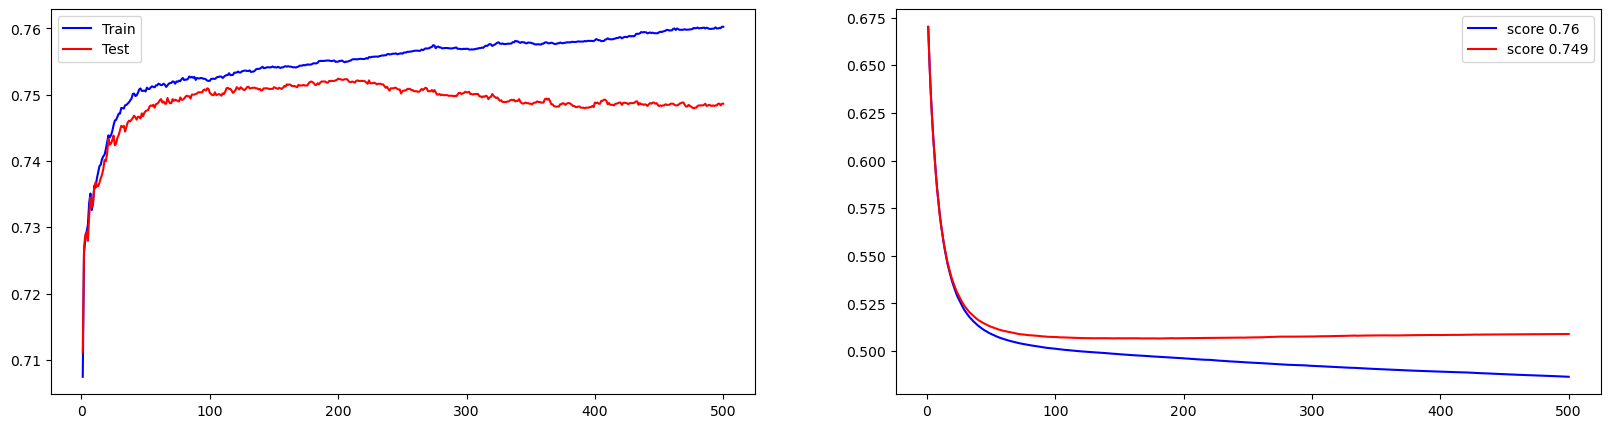

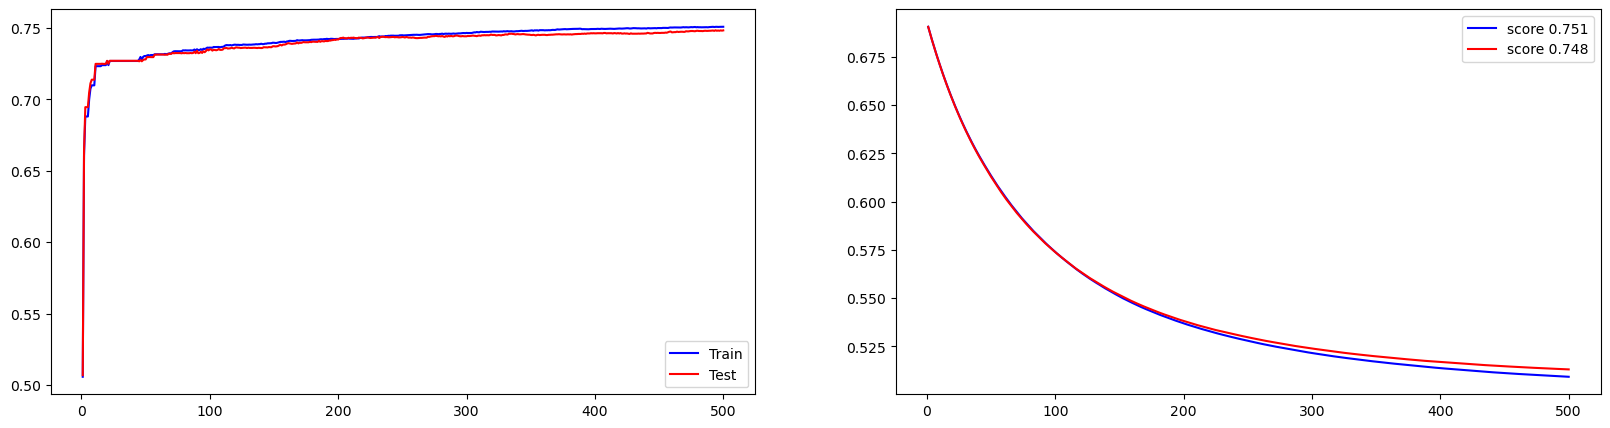

In [16]:
def plot_learnig_tree_new(estimator, X_train, X_test, y_train, y_test):  
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = 'blue'
    color_two = 'red'
    
    train_score = zero
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = accuracy_score(y_train, y_pred_train)
    ax1.plot(
        (np.arange(train_score.shape[0]) + 1),
        train_score,
        "-",
        color=color_one,
        label='Train',
        )
        
    test_score = zero
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        train_score[i] = accuracy_score(y_test, y_pred_test)    
    ax1.plot(
        (np.arange(test_score.shape[0]) + 1),
        train_score,
        "-",
        color = color_two,
        label='Test',
        )
    ax1.legend(loc='best')


    train_deviance = zero
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
        
    ax2.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        '-',
        color=color_one,
        label="score "+str(round(estimator.score(X_train, y_train),3))
    )

    test_deviance = zero
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
        
    ax2.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        '-',
        color=color_two,
        label="score "+str(round(estimator.score(X_test, y_test),3))
    )
    ax2.legend(loc='best')    
    

clf = GradientBoostingClassifier(n_estimators=500,random_state=42)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)



clf = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)

In [18]:
clf1 = GradientBoostingClassifier(n_estimators=80,random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf2 = GradientBoostingClassifier(n_estimators=120,random_state=42, learning_rate = 0.05)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf3 = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print(fbeta_score(y_test, y_pred1, beta = np.sqrt(2)))
print(fbeta_score(y_test, y_pred2, beta = np.sqrt(2)))
print(fbeta_score(y_test, y_pred3, beta = np.sqrt(2)))

0.7740342405618965
0.7746656434992327
0.7738010413812004


Unique labels: [0. 1.]
Numerical labels: [1 1 1 ... 1 1 1]


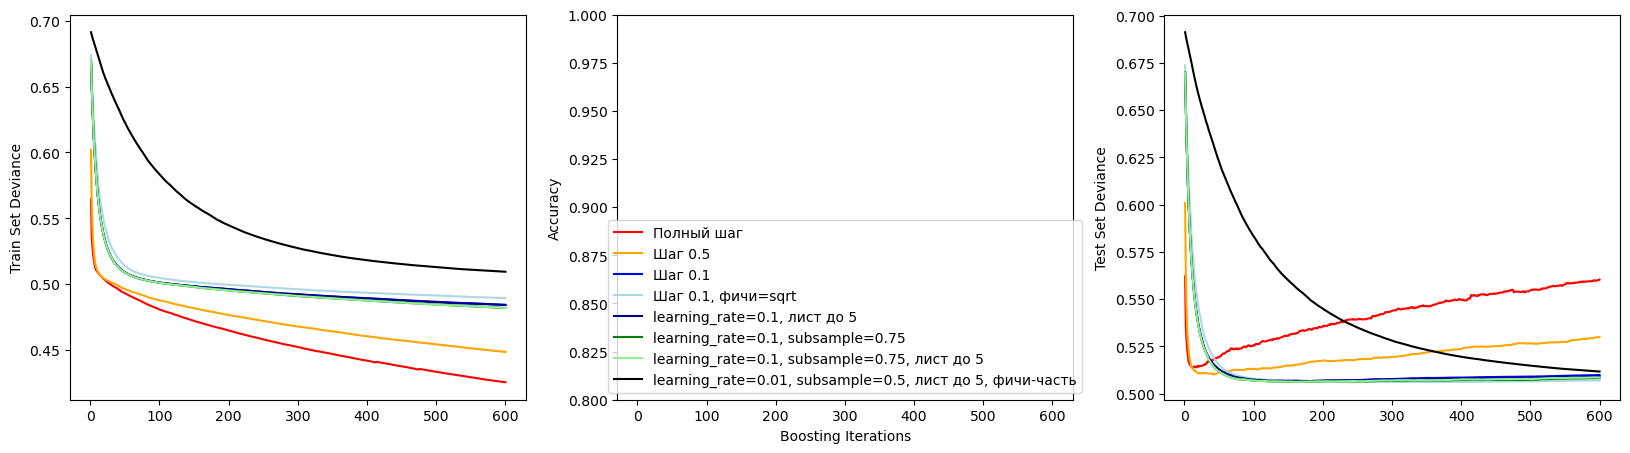

In [20]:
labels, y = np.unique(y_train, return_inverse=True)
print(f"Unique labels: {labels}")
print(f"Numerical labels: {y}")

original_params = {
    "n_estimators": 600,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
    
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, subsample=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, subsample=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, subsample=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = accuracy_score(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        

    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.8, 1.)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()

In [ ]:
clf3 = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)

In [21]:
gbrt = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=600,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
y_pred = gbrt.predict(X_test)
print(fbeta_score(y_test, y_pred, beta = np.sqrt(2)))

Правильность на обучающем наборе: 0.763
Правильность на тестовом наборе: 0.749


In [23]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=600,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
y_pred = gbrt.predict(X_test)
print(fbeta_score(y_test, y_pred, beta = np.sqrt(2)))

Правильность на обучающем наборе: 0.751
Правильность на тестовом наборе: 0.750
0.7740447957839263


In [24]:
gbrt = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=50,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
y_pred = gbrt.predict(X_test)
print(fbeta_score(y_test, y_pred, beta = np.sqrt(2)))

Правильность на обучающем наборе: 0.751
Правильность на тестовом наборе: 0.747
0.772921459086428


In [25]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=50,random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
y_pred = gbrt.predict(X_test)
print(fbeta_score(y_test, y_pred, beta = np.sqrt(2)))

Правильность на обучающем наборе: 0.731
Правильность на тестовом наборе: 0.730
0.7591328564407799


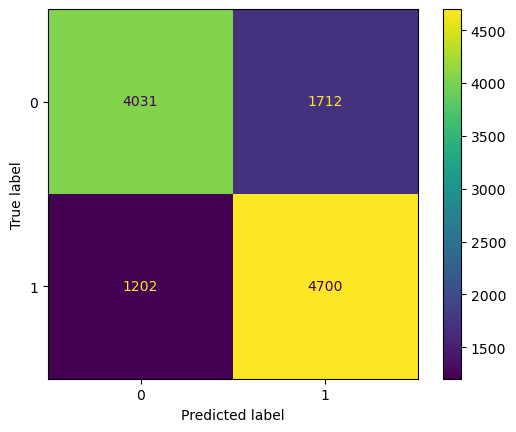

In [26]:

gbrt = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=600,random_state=12)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();

In [41]:
param_grid = {
    'learning_rate': [0.08, 0.1, 1.2],  #Example values, adjust as needed
    'subsample': [0.8, 0.9, 1.0],       #Example values, adjust as needed
    'min_samples_split': [12, 13, 14]   #Example values, adjust as needed
#    'n_estimators': [50, 100, 200]      #Example values, adjust as needed
}

# Create a scorer for the fbeta_score
fbeta_scorer = make_scorer(fbeta_score, beta=np.sqrt(2))

# Initialize the GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators = 600, random_state=12) #random_state for reproducibility

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gbrt, param_grid, scoring=fbeta_scorer, cv=5, n_jobs=-1) #cv = cross-validation folds
grid_search.fit(X_train, y_train)


# Get the best hyperparameters and the best Fbeta score
best_params = grid_search.best_params_
best_fbeta = grid_search.best_score_

print("Best hyperparameters:", best_params)
print(f"Best Fbeta score (beta=sqrt(2)): {best_fbeta}")

# Train the model with the best hyperparameters on the full training set
best_gbrt = GradientBoostingClassifier(**best_params,n_estimators = 600, random_state=12)
best_gbrt.fit(X_train, y_train)

#Make predictions and evaluate on test data
y_pred = best_gbrt.predict(X_test)
test_fbeta = fbeta_score(y_test, y_pred, beta=np.sqrt(2))
print(f"Test Fbeta score (beta=sqrt(2)) with best parameters: {test_fbeta}")

Best hyperparameters: {'learning_rate': 0.1, 'min_samples_split': 12, 'subsample': 0.9}
Best Fbeta score (beta=sqrt(2)): 0.7727640831671007
Test Fbeta score (beta=sqrt(2)) with best parameters: 0.7750410509031199


In [42]:
best_gbrt = GradientBoostingClassifier(learning_rate = 0.1, min_samples_split = 12, subsample = 0.9 ,n_estimators = 600, random_state=12)
best_gbrt.fit(X_train, y_train)

#Make predictions and evaluate on test data
y_pred = best_gbrt.predict(X_test)
test_fbeta = fbeta_score(y_test, y_pred, beta=np.sqrt(2))
print(f"Test Fbeta score (beta=sqrt(2)) with best parameters: {test_fbeta}")

Test Fbeta score (beta=sqrt(2)) with best parameters: 0.7750410509031199


In [ ]:
Best hyperparameters: {'learning_rate': 0.1, 'min_samples_split': 10, 'subsample': 0.8}
Best Fbeta score (beta=sqrt(2)): 0.7717350960801754
Test Fbeta score (beta=sqrt(2)) with best parameters: 0.7754599211563733

Best hyperparameters: {'learning_rate': 0.1, 'min_samples_split': 12, 'subsample': 0.9}
Best Fbeta score (beta=sqrt(2)): 0.7727640831671007
print(f"Test Fbeta score (beta=sqrt(2)) with best parameters: {test_fbeta}")

In [43]:
y_pred = best_gbrt.predict(X_test)
thresholds = np.arange(0, 1.01, 0.01)  # Thresholds from 0 to 1 with a step of 0.01
results = []

for threshold in thresholds:
    y_pred_proba = best_gbrt.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)
    fbeta = fbeta_score(y_test, y_pred, beta=np.sqrt(2))
    results.append([threshold, fbeta])

#Convert results to a DataFrame for better viewing (optional but recommended)
results_df = pd.DataFrame(results, columns=['Threshold', 'Fbeta (beta=sqrt(2))'])
print(results_df)

# Find the best threshold based on your preferred metric
best_threshold_fbeta = results_df.loc[results_df['Fbeta (beta=sqrt(2))'].idxmax()] #example - best threshold based on fbeta score
print("Best threshold based on Fbeta(beta=sqrt(2)):", best_threshold_fbeta)

     Threshold  Fbeta (beta=sqrt(2))
0         0.00              0.755086
1         0.01              0.756603
2         0.02              0.761786
3         0.03              0.767745
4         0.04              0.774100
..         ...                   ...
96        0.96              0.008614
97        0.97              0.003300
98        0.98              0.001270
99        0.99              0.000000
100       1.00              0.000000

[101 rows x 2 columns]
Best threshold based on Fbeta(beta=sqrt(2)): Threshold               0.300000
Fbeta (beta=sqrt(2))    0.818603
Name: 30, dtype: float64


In [40]:
best_gbrt.fit(X_train, y_train)
y_pred_proba = best_gbrt.predict_proba(X_test)[:, 1] 
threshold = 0.3  
y_pred = (y_pred_proba >= threshold).astype(int)
fbeta_score(y_test, y_pred, beta = np.sqrt(2))

0.8186032600568268